In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.4.1'

In [3]:
_URL = "http://127.0.0.1:81/pv/PlantVillage.zip"

In [5]:
zip_file = tf.keras.utils.get_file(origin=_URL, 
                                   fname="PlantVillage.zip",
                                   extract=True)

1884446720/1884439091 [==============================] - 18s 0us/step


In [6]:
base_dir = os.path.join(os.path.dirname(zip_file), 'PlantVillage\\train')
base_dir2 = os.path.join(os.path.dirname(zip_file), 'PlantVillage\\train')

In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [8]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

In [9]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

Found 46163 images belonging to 47 classes.


In [10]:
val_generator = datagen.flow_from_directory(
    base_dir2,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 11520 images belonging to 47 classes.


In [11]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape


((32, 256, 256, 3), (32, 47))

In [12]:
print (train_generator.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Mango_Unhealthy': 15, 'Mango__Healthy': 16, 'Orange___Haunglongbing_(Citrus_greening)': 17, 'Peach___Bacterial_spot': 18, 'Peach___healthy': 19, 'Pepper,_bell___Bacterial_spot': 20, 'Pepper,_bell___healthy': 21, 'Potato___Early_blight': 22, 'Potato___Late_blight': 23, 'Potato___healthy': 24, 'Raspberry___healthy': 25, 'Soybean___healthy': 26, 'Squash___Powdery_mildew': 27, 'Strawberry___Leaf_scorch': 28, 'Strawberry___healthy': 29, 'Tomato___Bacterial_spot': 30, 'Tomato___Early_bli

In [13]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))

In [14]:
with open('new_labels.txt', 'w') as f:
  f.write(labels)

In [15]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

In [16]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

In [17]:
base_model.trainable = False

In [18]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(47, activation='softmax')
])

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 6, 6, 32)          368672    
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 47)                6

In [21]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 8


In [22]:
epochs = 101

In [23]:
history = model.fit_generator(train_generator, 
                    epochs=epochs, 
                    validation_data=val_generator)


C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/101
1443/1443 [==============================] - 583s 391ms/step - loss: 1.1308 - accuracy: 0.6840 - val_loss: 0.4455 - val_accuracy: 0.8582
Epoch 2/101
1443/1443 [==============================] - 333s 231ms/step - loss: 0.3393 - accuracy: 0.8913 - val_loss: 0.3586 - val_accuracy: 0.8850
Epoch 3/101
1443/1443 [==============================] - 339s 235ms/step - loss: 0.2643 - accuracy: 0.9157 - val_loss: 0.3578 - val_accuracy: 0.8926
Epoch 4/101
1443/1443 [==============================] - 354s 245ms/step - loss: 0.2181 - accuracy: 0.9317 - val_loss: 0.3064 - val_accuracy: 0.9072
Epoch 5/101
1443/1443 [==============================] - 374s 259ms/step - loss: 0.1923 - accuracy: 0.9393 - val_loss: 0.3191 - val_accuracy: 0.9078
Epoch 6/101
1443/1443 [==============================] - 370s 257ms/step - loss: 0.1732 - accuracy: 0.9437 - val_loss: 0.3582 - val_accuracy: 0.9062
Epoch 7/101
1443/1443 [==============================] - 403s 279ms/step - loss: 0.1512 - accuracy: 0.9532

1443/1443 [==============================] - 1395s 967ms/step - loss: 0.0746 - accuracy: 0.9874 - val_loss: 1.1108 - val_accuracy: 0.9196
Epoch 56/101
1443/1443 [==============================] - 1256s 870ms/step - loss: 0.0897 - accuracy: 0.9854 - val_loss: 0.9452 - val_accuracy: 0.9220
Epoch 57/101
1443/1443 [==============================] - 1180s 818ms/step - loss: 0.0747 - accuracy: 0.9883 - val_loss: 0.9500 - val_accuracy: 0.9251
Epoch 58/101
1443/1443 [==============================] - 1354s 939ms/step - loss: 0.0846 - accuracy: 0.9862 - val_loss: 0.8769 - val_accuracy: 0.9235
Epoch 59/101
1443/1443 [==============================] - 1250s 866ms/step - loss: 0.0792 - accuracy: 0.9878 - val_loss: 0.8776 - val_accuracy: 0.9303
Epoch 60/101
1443/1443 [==============================] - 1277s 885ms/step - loss: 0.0983 - accuracy: 0.9849 - val_loss: 0.8813 - val_accuracy: 0.9268
Epoch 61/101
1443/1443 [==============================] - 1315s 912ms/step - loss: 0.0858 - accuracy: 0.988

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

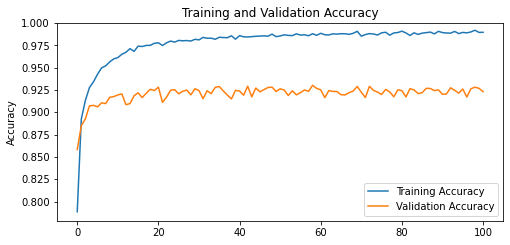

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

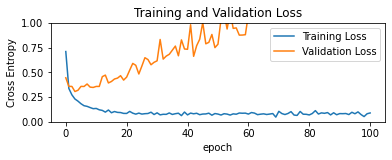

In [27]:
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [28]:
base_model.trainable = True

In [29]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [30]:
fine_tune_at = 101

In [31]:
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 6, 6, 32)          368672    
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 47)                6

In [34]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 62


In [35]:
history_fine = model.fit_generator(train_generator, 
                         epochs=11,
                         validation_data=val_generator)

Epoch 1/11
1443/1443 [==============================] - 1632s 1s/step - loss: 25.5923 - accuracy: 0.4586 - val_loss: 3.2489 - val_accuracy: 0.7796
Epoch 2/11
1443/1443 [==============================] - 1847s 1s/step - loss: 3.9092 - accuracy: 0.6414 - val_loss: 2.8088 - val_accuracy: 0.7228
Epoch 3/11
1443/1443 [==============================] - 1810s 1s/step - loss: 2.3045 - accuracy: 0.6885 - val_loss: 2.2382 - val_accuracy: 0.7408
Epoch 4/11
1443/1443 [==============================] - 1825s 1s/step - loss: 1.6337 - accuracy: 0.7391 - val_loss: 1.7792 - val_accuracy: 0.7766
Epoch 5/11
1443/1443 [==============================] - 2037s 1s/step - loss: 1.3482 - accuracy: 0.7788 - val_loss: 1.4190 - val_accuracy: 0.8015
Epoch 6/11
1443/1443 [==============================] - 1891s 1s/step - loss: 0.9726 - accuracy: 0.8166 - val_loss: 1.1771 - val_accuracy: 0.8345
Epoch 7/11
1443/1443 [==============================] - 1942s 1s/step - loss: 0.8045 - accuracy: 0.8448 - val_loss: 1.0191 

In [36]:
saved_model_dir = '.'
tf.saved_model.save(model, saved_model_dir)

INFO:tensorflow:Assets written to: .\assets


In [37]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

In [38]:
with open('new_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [39]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

In [40]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

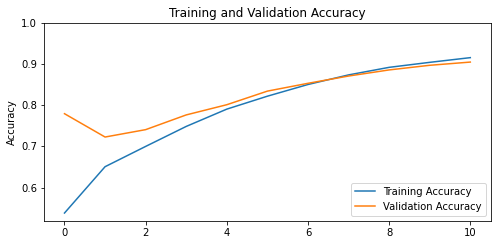

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

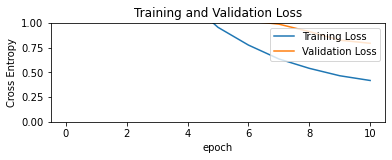

In [42]:
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()